## Facies Clustering


##### 1. Loading necessory libraries

In [ ]:
#!pip install lasio

In [4]:
import pandas as pd
import os
import pathlib
from pathlib import Path
import cv2
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing
import warnings
import lasio
import seaborn as sns
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
from platform import python_version
python_version()

'3.9.12'

In [6]:
os.getcwd()

'C:\\Users\\Nusrat\\Desktop\\Facies classificationclustering'

## LAS data Loading

In [7]:
folder_path = "Las/"
uwis = []
dfs = []
p = Path("Las/")
for path in p.glob("*.Las"):    
    uwi = path.stem
    las = lasio.read(path)
    df = las.df()
    df['UWI'] = uwi
    uwis.append(uwi)
    dfs.append(df)
    las_to_df_combine=pd.concat(dfs, keys=uwis)
    #las_to_df_combine = las_to_df_combine.reset_index().set_index(['UWI', 'DEPT']).sort_index()
    las_to_df_combine = las_to_df_combine.reset_index().set_index(['UWI']).sort_index()
    las_to_df_combine.to_csv("las_to_df_combine.csv")


Only engine='normal' can read wrapped files
Only engine='normal' can read wrapped files


In [19]:
las_to_df_combine = pd.read_csv("las_to_df_combine.csv").reset_index().set_index(['UWI']).sort_index()
las_to_df_combine.columns

Index(['index', 'level_0', 'DEPT', 'M_RESM', 'M_GR', 'M_DPHI_SS', 'M_DRHO',
       'M_DT_SHEAR', 'M_NPHI_SS', 'M_CALI', 'M_PE', 'M_DT', 'M_RESS', 'M_RHOB',
       'M_CALI_X', 'M_SP', 'M_RESD', 'VMI', 'I_DT33', 'I_VCL', 'I_RXO',
       'I_VQUA', 'I_SG', 'I_BMFG', 'I_DT66', 'I_DT55', 'I_PHIE', 'I_VDOL',
       'I_LVMI', 'I_VCOA', 'I_BMFO', 'I_SWE', 'I_VBWA', 'I_BMFS', 'I_DT44',
       'I_VLIM', 'I_BMFW', 'I_RHOB', 'I_SO', 'I_RT'],
      dtype='object')

In [20]:
las_to_df_combine.drop(columns=['level_0','M_RESM','I_DT33','I_RXO','M_DRHO', 'I_VQUA', 'I_SG', 'I_BMFG',
       'I_DT66', 'I_DT55', 'I_PHIE', 'I_VDOL', 'I_LVMI', 'I_VCOA', 'I_BMFO','M_NPHI_SS',
       'I_SWE', 'I_VBWA', 'I_BMFS', 'I_DT44', 'I_BMFW', 'I_SO', 'M_CALI_X','I_RHOB', 'M_DT_SHEAR','M_SP', 'I_VLIM', 'M_CALI', 'M_RESS', 'I_RT'], inplace = True)
las_to_df_combine

,index,DEPT,M_GR,M_DPHI_SS,M_PE,M_DT,M_RHOB,M_RESD,VMI,I_VCL
UWI,,,,,,,,,,
Well_log1,0,0.05080,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.250000
Well_log1,1,0.10080,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.250000
Well_log1,2,0.15080,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.250000
Well_log1,3,0.20080,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.250000
Well_log1,4,0.25080,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.250000
...,...,...,...,...,...,...,...,...,...,...
Well_log2,10573,318.19999,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,0.293552
Well_log2,10574,318.24999,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,0.296719
Well_log2,10575,318.29999,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,0.299698


## LAS processing

In [21]:
las_to_df_combine = las_to_df_combine[(las_to_df_combine['DEPT']>= 150) & (las_to_df_combine['DEPT']<= 300)]
las_to_df_combine = las_to_df_combine[(las_to_df_combine['M_GR']>= 0) & (las_to_df_combine['M_GR']<= 300)]
las_to_df_combine = las_to_df_combine[(las_to_df_combine['M_DPHI_SS']>= 0) & (las_to_df_combine['M_DPHI_SS']<= 1)]
#las_to_df_combine = las_to_df_combine[(las_to_df_combine['M_NPHI_SS']>= 0) & (las_to_df_combine['M_NPHI_SS']<= 1)]
las_to_df_combine = las_to_df_combine[(las_to_df_combine['M_RHOB']>= 1) & (las_to_df_combine['M_RHOB']<= 3)]
las_to_df_combine = las_to_df_combine[(las_to_df_combine['VMI']>= 0) & (las_to_df_combine['VMI']<= 1)]
las_to_df_combine = las_to_df_combine[(las_to_df_combine['I_VCL']>= 0) & (las_to_df_combine['I_VCL']<= 1)]

las_to_df_combine.reset_index().set_index(['UWI']).sort_index()

,index,DEPT,M_GR,M_DPHI_SS,M_PE,M_DT,M_RHOB,M_RESD,VMI,I_VCL
UWI,,,,,,,,,,
Well_log1,2999,150.0008,71.810669,0.301731,1.914670,162.319595,2.151441,18.418682,0.8548,0.109084
Well_log1,3000,150.0508,70.993217,0.298657,1.933263,160.487213,2.156331,18.377306,0.2992,0.120631
Well_log1,3001,150.1008,70.175728,0.295606,1.960289,158.654800,2.162041,19.116812,0.6728,0.125435
Well_log1,3002,150.1508,68.539764,0.293351,1.996825,157.389267,2.167367,20.112026,0.3732,0.120930
Well_log1,3003,150.2008,66.610237,0.291383,1.990096,156.327087,2.171351,20.733994,0.5980,0.112704
...,...,...,...,...,...,...,...,...,...,...
Well_log1,4139,207.0008,64.796303,0.037551,4.099511,122.652924,2.588433,36.664940,0.9884,0.274055
Well_log1,4140,207.0508,64.796303,0.032925,4.121999,122.652924,2.596164,36.292957,0.9992,0.274555
Well_log1,4141,207.1008,64.796303,0.028378,4.090661,122.652924,2.603291,34.534180,0.9900,0.276292


In [22]:
las_to_df_combine.describe()

,index,DEPT,M_GR,M_DPHI_SS,M_PE,M_DT,M_RHOB,M_RESD,VMI,I_VCL
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000
mean,3552.270142,177.664307,40.033178,0.298717,1.984234,125.727508,2.157089,102.366955,0.226662,0.077706
std,326.665529,16.333276,17.212460,0.091174,0.886644,19.820135,0.150477,127.807337,0.353163,0.082061
min,2999.000000,150.000800,11.643404,0.001623,1.430272,12.534511,2.011633,14.539099,0.000000,0.000000
25%,3270.500000,163.575800,26.791598,0.302252,1.600628,122.075943,2.075978,33.249870,0.000000,0.020724
50%,3546.000000,177.350800,36.003323,0.329835,1.679913,124.426933,2.105791,52.514061,0.009200,0.047471
75%,3832.500000,191.675800,52.251282,0.348113,1.799830,127.322308,2.152697,121.692547,0.320000,0.099629
max,4143.000000,207.200800,95.848793,0.385712,5.864848,223.451385,2.646591,1180.714356,1.000000,0.361535


## Display well data

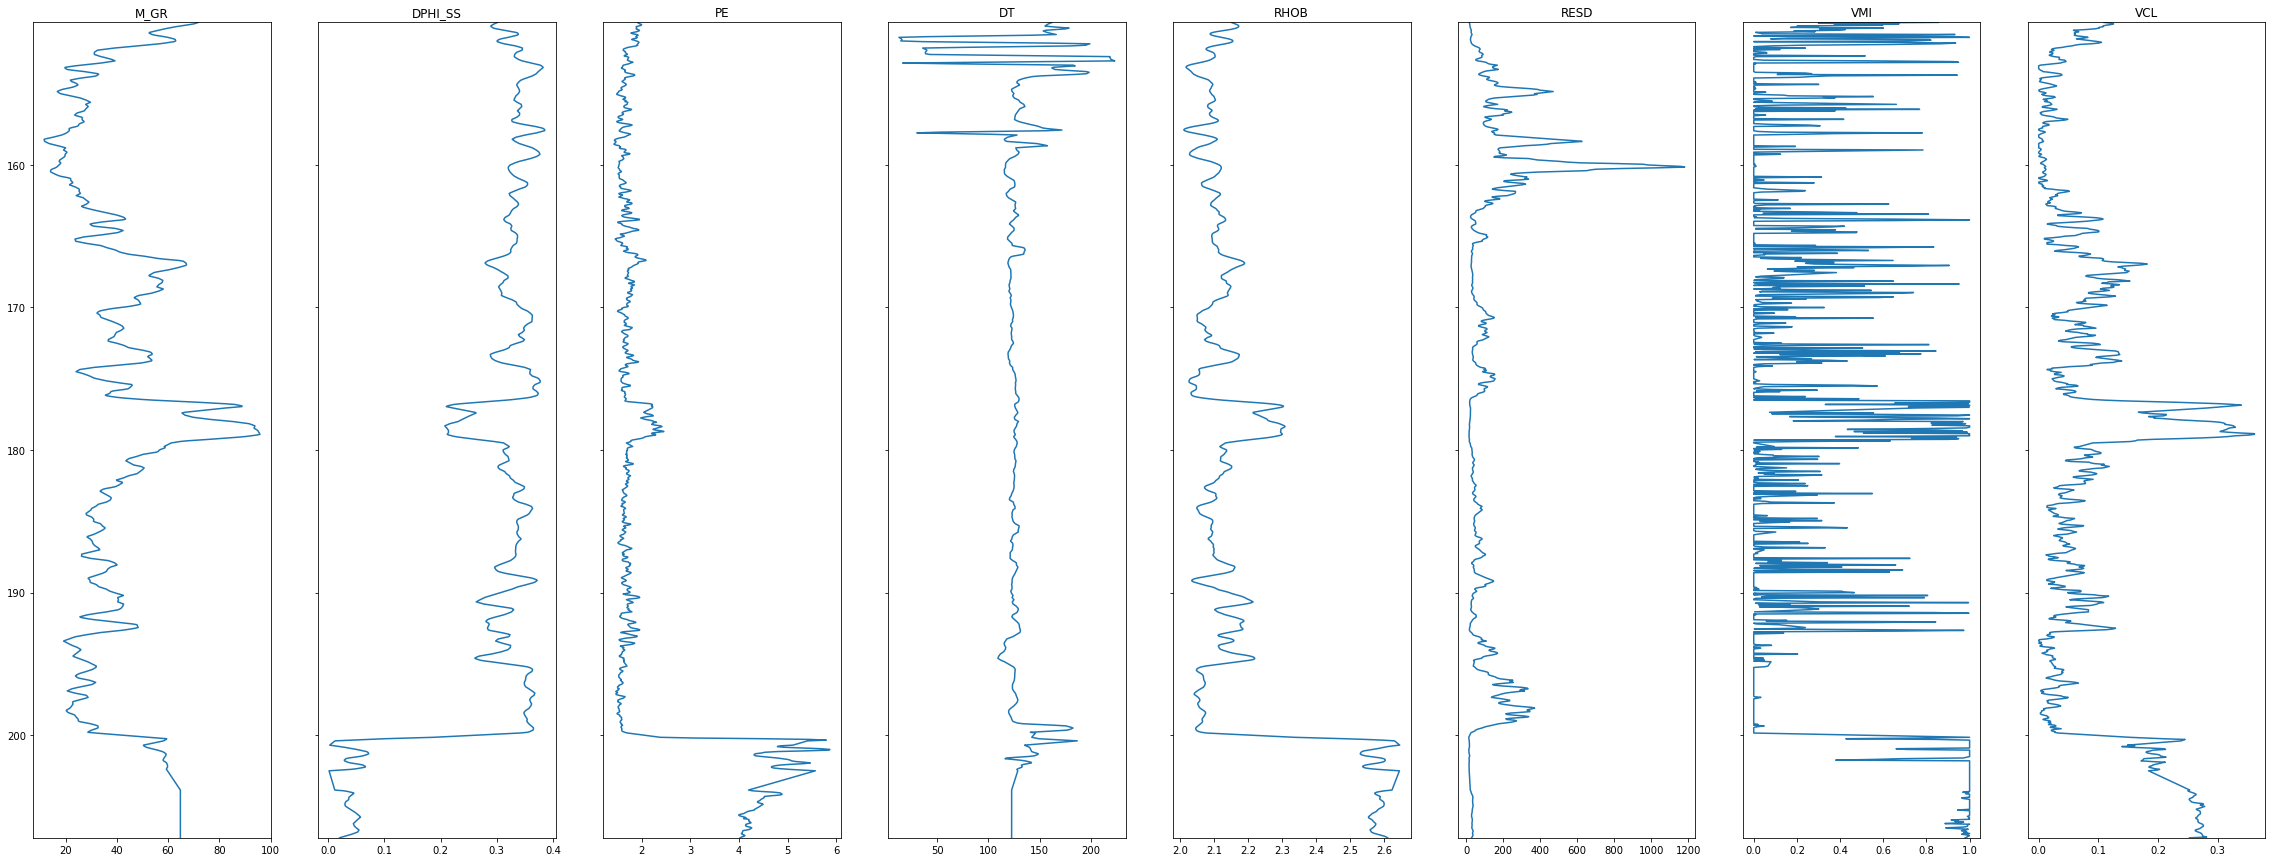

In [25]:
display_well1 = las_to_df_combine.loc["Well_log1"]
display_well = display_well1[['DEPT','M_GR','M_DPHI_SS','M_PE','M_DT','M_RHOB','M_RESD','VMI','I_VCL']]
nimonics = ['DEPT','M_GR','DPHI_SS','PE','DT','RHOB','RESD','VMI','VCL']
rows, cols = 1,8
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(40,15), sharey=True)
for i in range(cols):
    ax[i].plot(display_well.iloc[:,i+1], display_well.iloc[:,0])
    ax[i].set_ylim(max(display_well.iloc[:, 0]), min(display_well.iloc[:, 0]))
    ax[i].set_title('%s' %nimonics[i+1])
plt.show()

## EDT:  Multiariate analysis

In [ ]:
sns.pairplot(data = las_MGS_FmTops_data.drop(columns=['DEPT']), hue ="fm_tops",  corner=True);

## Facies Clustering (Unsupervised)

#### 1. K_Mean clustering

In [27]:
las_to_df_combine

,index,DEPT,M_GR,M_DPHI_SS,M_PE,M_DT,M_RHOB,M_RESD,VMI,I_VCL
UWI,,,,,,,,,,
Well_log1,2999,150.0008,71.810669,0.301731,1.914670,162.319595,2.151441,18.418682,0.8548,0.109084
Well_log1,3000,150.0508,70.993217,0.298657,1.933263,160.487213,2.156331,18.377306,0.2992,0.120631
Well_log1,3001,150.1008,70.175728,0.295606,1.960289,158.654800,2.162041,19.116812,0.6728,0.125435
Well_log1,3002,150.1508,68.539764,0.293351,1.996825,157.389267,2.167367,20.112026,0.3732,0.120930
Well_log1,3003,150.2008,66.610237,0.291383,1.990096,156.327087,2.171351,20.733994,0.5980,0.112704
...,...,...,...,...,...,...,...,...,...,...
Well_log1,4139,207.0008,64.796303,0.037551,4.099511,122.652924,2.588433,36.664940,0.9884,0.274055
Well_log1,4140,207.0508,64.796303,0.032925,4.121999,122.652924,2.596164,36.292957,0.9992,0.274555
Well_log1,4141,207.1008,64.796303,0.028378,4.090661,122.652924,2.603291,34.534180,0.9900,0.276292


In [28]:
from sklearn.cluster import KMeans

# Training model
model_near = KMeans(n_clusters = 5, random_state=10).fit(las_to_df_combine[['M_GR','M_DPHI_SS','M_PE','M_DT','M_RHOB','M_RESD','VMI','I_VCL']])

# Predictions
pred_K_Facies = model_near.predict(las_to_df_combine[['M_GR','M_DPHI_SS','M_PE','M_DT','M_RHOB','M_RESD','VMI','I_VCL']])

# New columns in the data
las_to_df_combine['K_Cluster_facies'] = pred_K_Facies

las_to_df_combine

,index,DEPT,M_GR,M_DPHI_SS,M_PE,M_DT,M_RHOB,M_RESD,VMI,I_VCL,K_Cluster_facies
UWI,,,,,,,,,,,
Well_log1,2999,150.0008,71.810669,0.301731,1.914670,162.319595,2.151441,18.418682,0.8548,0.109084,0
Well_log1,3000,150.0508,70.993217,0.298657,1.933263,160.487213,2.156331,18.377306,0.2992,0.120631,0
Well_log1,3001,150.1008,70.175728,0.295606,1.960289,158.654800,2.162041,19.116812,0.6728,0.125435,0
Well_log1,3002,150.1508,68.539764,0.293351,1.996825,157.389267,2.167367,20.112026,0.3732,0.120930,0
Well_log1,3003,150.2008,66.610237,0.291383,1.990096,156.327087,2.171351,20.733994,0.5980,0.112704,0
...,...,...,...,...,...,...,...,...,...,...,...
Well_log1,4139,207.0008,64.796303,0.037551,4.099511,122.652924,2.588433,36.664940,0.9884,0.274055,0
Well_log1,4140,207.0508,64.796303,0.032925,4.121999,122.652924,2.596164,36.292957,0.9992,0.274555,0
Well_log1,4141,207.1008,64.796303,0.028378,4.090661,122.652924,2.603291,34.534180,0.9900,0.276292,0


#### 2. GMM clustering

In [29]:
from sklearn.mixture import GaussianMixture

init = "kmeans"
gmm = GaussianMixture(n_components=5,
        covariance_type="full",
        n_init = 10,
        init_params = init,
        random_state = 10)

# Fit the model to our dataset
gmm.fit(las_to_df_combine[['M_GR','M_DPHI_SS','M_PE','M_DT','M_RHOB','M_RESD','VMI','I_VCL']])

# Predict the labels
gmm_labels = gmm.predict(las_to_df_combine[['M_GR','M_DPHI_SS','M_PE','M_DT','M_RHOB','M_RESD','VMI','I_VCL']])

# Assign the labels back to the workingdf
las_to_df_combine['GMM_facies'] = gmm_labels
las_to_df_combine

,index,DEPT,M_GR,M_DPHI_SS,M_PE,M_DT,M_RHOB,M_RESD,VMI,I_VCL,K_Cluster_facies,GMM_facies
UWI,,,,,,,,,,,,
Well_log1,2999,150.0008,71.810669,0.301731,1.914670,162.319595,2.151441,18.418682,0.8548,0.109084,0,1
Well_log1,3000,150.0508,70.993217,0.298657,1.933263,160.487213,2.156331,18.377306,0.2992,0.120631,0,1
Well_log1,3001,150.1008,70.175728,0.295606,1.960289,158.654800,2.162041,19.116812,0.6728,0.125435,0,1
Well_log1,3002,150.1508,68.539764,0.293351,1.996825,157.389267,2.167367,20.112026,0.3732,0.120930,0,1
Well_log1,3003,150.2008,66.610237,0.291383,1.990096,156.327087,2.171351,20.733994,0.5980,0.112704,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
Well_log1,4139,207.0008,64.796303,0.037551,4.099511,122.652924,2.588433,36.664940,0.9884,0.274055,0,0
Well_log1,4140,207.0508,64.796303,0.032925,4.121999,122.652924,2.596164,36.292957,0.9992,0.274555,0,0
Well_log1,4141,207.1008,64.796303,0.028378,4.090661,122.652924,2.603291,34.534180,0.9900,0.276292,0,0


## plotting  facies

In [39]:
import matplotlib.colors as colors

def create_plot(wellname, dataframe, curves_to_plot, depth_curve, log_curves=[], facies_curves=[]):
    # Count the number of tracks we need
    num_tracks = len(curves_to_plot)
    
    facies_color = ['#FCEEA7','#F4D03F','#DC7633','#6E2C00','#196F3D' ]
    
            #,'#F5B041','#2E86C1', '#AED6F1', '#A569BD', '#1B4F72'
    # Setup the figure and axes
    fig, ax = plt.subplots(nrows=1, ncols=num_tracks, figsize=(num_tracks*2, 10))
    
    # Create a super title for the entire plot
    fig.suptitle(wellname, fontsize=20, y=1.05)
    
    # Loop through each curve in curves_to_plot and create a track with that data
    for i, curve in enumerate(curves_to_plot):
        if curve in facies_curves:
            cmap_facies = colors.ListedColormap(facies_color[0:dataframe[curve].max()], 'indexed')
            
            cluster=np.repeat(np.expand_dims(dataframe[curve].values,1), 100, 1)
            im=ax[i].imshow(cluster, interpolation='none', cmap=cmap_facies, aspect='auto',vmin=dataframe[curve].min(),vmax=dataframe[curve].max(), extent=[0,20, depth_curve.max(), depth_curve.min()])
        else:
            ax[i].plot(dataframe[curve], depth_curve)

        
        # Setup a few plot cosmetics
        ax[i].set_title(curve, fontsize=14, fontweight='bold')
        ax[i].grid(which='major', color='lightgrey', linestyle='-')
        
        # We want to pass in the deepest depth first, so we are displaying the data 
        # from shallow to deep
        ax[i].set_ylim(depth_curve.max(), depth_curve.min())
#         ax[i].set_ylim(3500, 3000)

        # Only set the y-label for the first track. Hide it for the rest
        if i == 0:
            ax[i].set_ylabel('DEPTH (m)', fontsize=18, fontweight='bold')
        else:
            plt.setp(ax[i].get_yticklabels(), visible = False)
        
        # Check to see if we have any logarithmic scaled curves
        if curve in log_curves:
            ax[i].set_xscale('log')
            ax[i].grid(which='minor', color='lightgrey', linestyle='-')
        

    
    plt.tight_layout()
    plt.show()
    
    return cmap_facies

In [31]:
def well_splitter(dataframe, groupby_column):
    grouped = dataframe.groupby(groupby_column)
    
    # Create empty lists
    wells_as_dfs = []
    wells_wellnames = []

    #Split up the data by well
    for well, data in grouped:
        wells_as_dfs.append(data)
        wells_wellnames.append(well)

    print('index  wellname')
    for i, name in enumerate(wells_wellnames):
        print(f'{i}      {name}')
    
    return wells_as_dfs, wells_wellnames

In [32]:
dfs_wells, wellnames = well_splitter(las_to_df_combine, 'UWI')

index  wellname
0      Well_log1


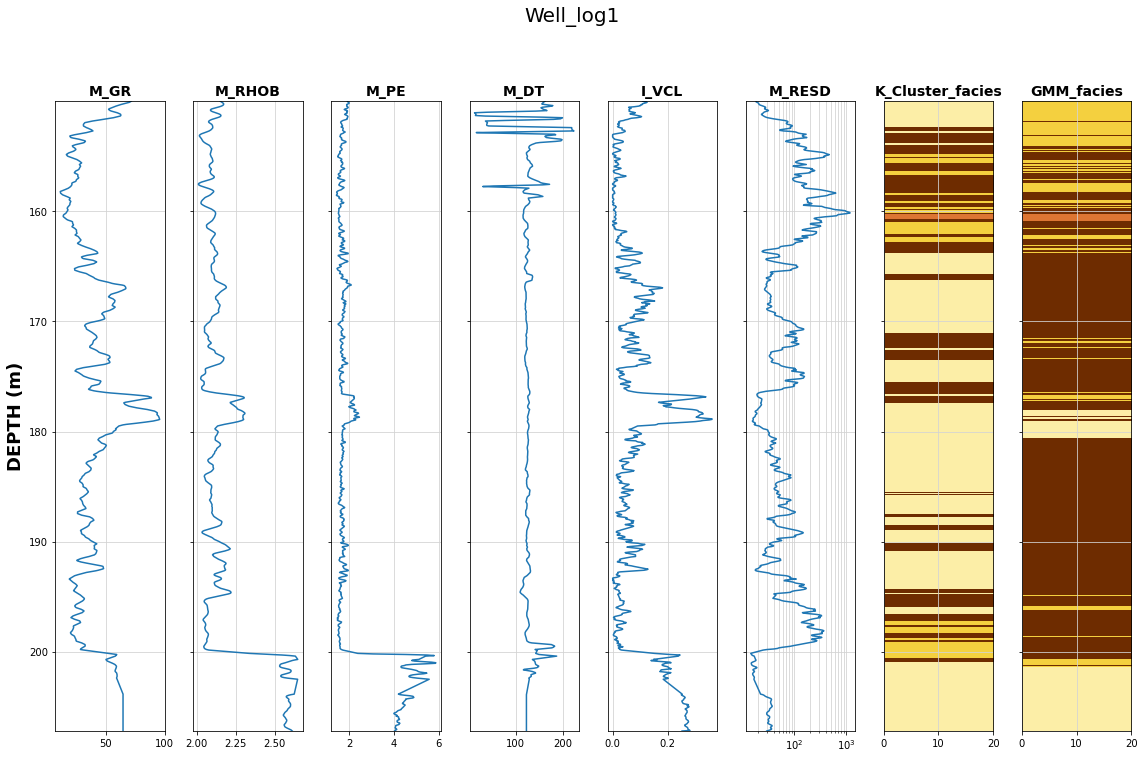

In [40]:
# Setup the curves to plot
curves_to_plot = ['M_GR', 'M_RHOB', 'M_PE', 'M_DT','I_VCL', 'M_RESD','K_Cluster_facies','GMM_facies']
logarithmic_curves = ['M_RESD']
facies_curve=['K_Cluster_facies','GMM_facies']

# Create plot by passing in the relevant well index number
UWI =0
cmap_facies = create_plot(wellnames[UWI], 
            dfs_wells[UWI], 
            curves_to_plot, 
            dfs_wells[UWI]['DEPT'], 
            logarithmic_curves, facies_curve)

## Facies classification (supervised)

In [ ]:
Other jupyter notebook